In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../..')

In [4]:
import deepmatcher as dm
from utils.intermediate_layer_extraction import return_layer_input
from utils.ri_calculator import computeRi
import pandas as pd

## Dataset creation with hybrid model

In [5]:
attributes = ['title','authors','venue','year']

In [11]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('../../models/dblp_acm_hybrid.pth')
hybrid_model = hybrid_model.cuda()

In [12]:
testneg_hybrid,testneg_ids_hybrid = return_layer_input('../../Structured/DBLP-ACM/','test_negatives',
                                                           batch_size=128,model=hybrid_model,
                                                                         layer=hybrid_model.classifier)

In [13]:
testpos_hybrid,testpos_ids = return_layer_input('../../Structured/DBLP-ACM/','test_positives',
                                                           batch_size=128,model=hybrid_model,
                                                layer=hybrid_model.classifier)

In [14]:
positives_hybrid,pos_ids_hybrid = return_layer_input('../../Structured/DBLP-ACM/','positives',
                                                           batch_size=128,model=hybrid_model,
                                              layer=hybrid_model.classifier)

In [15]:
negatives_hybrid,neg_ids_hybrid = return_layer_input('../../Structured/DBLP-ACM/','negatives',
                                                           batch_size=128,model=hybrid_model,
                                              layer=hybrid_model.classifier)

In [16]:
## Basta scegliere un campione a caso
classifier_len = len(testneg_hybrid[0][0])
attribute_len = int(classifier_len/len(attributes))

## Ri discovery

### Negatives

In [17]:
neg_ri,neg_ri_norms = computeRi(hybrid_model.classifier,attributes,testneg_hybrid,attribute_len,
                               1)

  8%|▊         | 10/128 [00:01<00:21,  5.54it/s]

can't converge in 100 iterations


  9%|▉         | 12/128 [00:02<00:31,  3.68it/s]

can't converge in 100 iterations


 10%|█         | 13/128 [00:02<00:29,  3.94it/s]

can't converge in 100 iterations


 70%|███████   | 90/128 [00:15<00:09,  4.21it/s]

can't converge in 100 iterations


 54%|█████▍    | 69/128 [00:12<00:14,  3.94it/s]

can't converge in 100 iterations


 54%|█████▍    | 69/128 [00:11<00:10,  5.77it/s]

can't converge in 100 iterations


 55%|█████▌    | 71/128 [00:12<00:15,  3.75it/s]

can't converge in 100 iterations


 90%|████████▉ | 115/128 [00:19<00:02,  5.68it/s]

can't converge in 100 iterations


 91%|█████████▏| 117/128 [00:20<00:02,  3.73it/s]

can't converge in 100 iterations


100%|██████████| 128/128 [00:21<00:00,  6.02it/s]


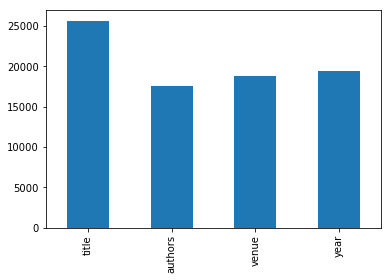

In [19]:
negatives_variation_df = pd.DataFrame(data= neg_ri_norms,columns=attributes)
negatives_variation_df.sum(numeric_only=True).plot.bar()

In [20]:
negatives_variation_df.to_csv('experiment_results/testneg_ri_hybrid.csv',index=False)

### Positives

In [23]:
pos_ri,pos_ri_norms = computeRi(hybrid_model.classifier,attributes,testpos_hybrid,attribute_len,
                               0)


  3%|▎         | 4/128 [00:00<00:28,  4.30it/s]

can't converge in 100 iterations



  4%|▍         | 5/128 [00:01<00:34,  3.53it/s]

can't converge in 100 iterations
can't converge in 100 iterations



  9%|▊         | 11/128 [00:02<00:26,  4.40it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 10%|█         | 13/128 [00:02<00:29,  3.85it/s]

can't converge in 100 iterations



 13%|█▎        | 17/128 [00:03<00:25,  4.31it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 15%|█▍        | 19/128 [00:03<00:27,  3.90it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 19%|█▉        | 24/128 [00:04<00:23,  4.35it/s]

can't converge in 100 iterations



 36%|███▌      | 46/128 [00:06<00:05, 13.78it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 39%|███▉      | 50/128 [00:07<00:13,  5.96it/s]

can't converge in 100 iterations



 42%|████▏     | 54/128 [00:08<00:12,  5.75it/s]

can't converge in 100 iterations



 47%|████▋     | 60/128 [00:09<00:11,  6.17it/s]

can't converge in 100 iterations


can't converge in 100 iterations



 48%|████▊     | 62/128 [00:09<00:14,  4.56it/s]

can't converge in 100 iterations



 50%|█████     | 64/128 [00:10<00:15,  4.17it/s]

can't converge in 100 iterations



 58%|█████▊    | 74/128 [00:11<00:07,  7.50it/s]

can't converge in 100 iterations



 60%|██████    | 77/128 [00:12<00:08,  6.08it/s]

can't converge in 100 iterations



 63%|██████▎   | 81/128 [00:12<00:10,  4.49it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 65%|██████▍   | 83/128 [00:13<00:11,  3.91it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 68%|██████▊   | 87/128 [00:14<00:08,  4.70it/s]

can't converge in 100 iterations



 73%|███████▎  | 94/128 [00:15<00:06,  5.13it/s]

can't converge in 100 iterations



 77%|███████▋  | 99/128 [00:15<00:03,  7.74it/s]

can't converge in 100 iterations



 79%|███████▉  | 101/128 [00:16<00:05,  4.99it/s]

can't converge in 100 iterations



 80%|████████  | 103/128 [00:16<00:05,  4.77it/s]

can't converge in 100 iterations



 89%|████████▉ | 114/128 [00:17<00:01,  7.36it/s]

can't converge in 100 iterations



 93%|█████████▎| 119/128 [00:18<00:00,  9.34it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 95%|█████████▌| 122/128 [00:19<00:01,  4.48it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 96%|█████████▌| 123/128 [00:20<00:01,  2.88it/s]

can't converge in 100 iterations



100%|██████████| 128/128 [00:20<00:00,  6.18it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

can't converge in 100 iterations



  2%|▏         | 2/128 [00:00<00:14,  9.00it/s]

can't converge in 100 iterations



  5%|▍         | 6/128 [00:01<00:18,  6.77it/s]

can't converge in 100 iterations



  7%|▋         | 9/128 [00:01<00:22,  5.34it/s]

can't converge in 100 iterations



 10%|█         | 13/128 [00:02<00:25,  4.50it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 11%|█         | 14/128 [00:03<00:40,  2.84it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 12%|█▏        | 15/128 [00:03<00:50,  2.24it/s]

can't converge in 100 iterations



 13%|█▎        | 17/128 [00:04<00:42,  2.62it/s]

can't converge in 100 iterations



 15%|█▍        | 19/128 [00:04<00:37,  2.93it/s]

can't converge in 100 iterations



 19%|█▉        | 24/128 [00:05<00:23,  4.35it/s]

can't converge in 100 iterations



 25%|██▌       | 32/128 [00:05<00:11,  8.47it/s]

can't converge in 100 iterations



 27%|██▋       | 34/128 [00:06<00:17,  5.47it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 34%|███▍      | 44/128 [00:08<00:16,  5.12it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 35%|███▌      | 45/128 [00:09<00:28,  2.96it/s]

can't converge in 100 iterations



 38%|███▊      | 48/128 [00:09<00:22,  3.57it/s]

can't converge in 100 iterations



 39%|███▉      | 50/128 [00:10<00:20,  3.76it/s]

can't converge in 100 iterations



 43%|████▎     | 55/128 [00:10<00:16,  4.41it/s]

can't converge in 100 iterations



 45%|████▍     | 57/128 [00:11<00:15,  4.44it/s]

can't converge in 100 iterations



 48%|████▊     | 61/128 [00:11<00:12,  5.38it/s]

can't converge in 100 iterations



 48%|████▊     | 62/128 [00:12<00:21,  3.12it/s]

can't converge in 100 iterations



 49%|████▉     | 63/128 [00:12<00:22,  2.85it/s]

can't converge in 100 iterations



 51%|█████     | 65/128 [00:13<00:21,  2.92it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 54%|█████▍    | 69/128 [00:14<00:17,  3.40it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 55%|█████▌    | 71/128 [00:14<00:17,  3.28it/s]

can't converge in 100 iterations



 61%|██████    | 78/128 [00:15<00:10,  4.70it/s]

can't converge in 100 iterations



 62%|██████▎   | 80/128 [00:15<00:09,  5.28it/s]

can't converge in 100 iterations



 63%|██████▎   | 81/128 [00:16<00:15,  3.11it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 66%|██████▌   | 84/128 [00:17<00:13,  3.25it/s]

can't converge in 100 iterations



 68%|██████▊   | 87/128 [00:17<00:10,  3.90it/s]

can't converge in 100 iterations



 74%|███████▍  | 95/128 [00:18<00:04,  7.41it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 76%|███████▌  | 97/128 [00:19<00:07,  3.88it/s]

can't converge in 100 iterations
can't converge in 100 iterations
can't converge in 100 iterations



 79%|███████▉  | 101/128 [00:20<00:07,  3.75it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 83%|████████▎ | 106/128 [00:21<00:04,  4.68it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 87%|████████▋ | 111/128 [00:22<00:03,  5.35it/s]

can't converge in 100 iterations



 94%|█████████▍| 120/128 [00:23<00:01,  6.40it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 98%|█████████▊| 125/128 [00:23<00:00,  6.32it/s]

can't converge in 100 iterations



100%|██████████| 128/128 [00:23<00:00,  5.34it/s]

  5%|▍         | 6/128 [00:00<00:13,  8.73it/s]

can't converge in 100 iterations



  5%|▌         | 7/128 [00:01<00:32,  3.70it/s]

can't converge in 100 iterations
can't converge in 100 iterations



  8%|▊         | 10/128 [00:01<00:30,  3.82it/s]

can't converge in 100 iterations



 13%|█▎        | 17/128 [00:02<00:22,  4.95it/s]

can't converge in 100 iterations



 20%|██        | 26/128 [00:03<00:13,  7.45it/s]

can't converge in 100 iterations



 27%|██▋       | 34/128 [00:04<00:13,  7.20it/s]

can't converge in 100 iterations



 45%|████▍     | 57/128 [00:05<00:04, 16.42it/s]

can't converge in 100 iterations



 47%|████▋     | 60/128 [00:06<00:07,  8.68it/s]

can't converge in 100 iterations



 54%|█████▍    | 69/128 [00:07<00:06,  8.57it/s]

can't converge in 100 iterations



 64%|██████▍   | 82/128 [00:08<00:06,  6.64it/s]

can't converge in 100 iterations



 68%|██████▊   | 87/128 [00:09<00:06,  6.47it/s]

can't converge in 100 iterations



 78%|███████▊  | 100/128 [00:10<00:02, 12.23it/s]

can't converge in 100 iterations



 81%|████████▏ | 104/128 [00:11<00:03,  7.16it/s]

can't converge in 100 iterations



 98%|█████████▊| 126/128 [00:12<00:00, 12.86it/s]

can't converge in 100 iterations
can't converge in 100 iterations



100%|██████████| 128/128 [00:13<00:00,  9.25it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

can't converge in 100 iterations
can't converge in 100 iterations



  5%|▌         | 3/60 [00:00<00:13,  4.24it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 10%|█         | 6/60 [00:01<00:12,  4.24it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 13%|█▎        | 8/60 [00:02<00:13,  3.78it/s]

can't converge in 100 iterations



 15%|█▌        | 9/60 [00:02<00:16,  3.17it/s]

can't converge in 100 iterations
can't converge in 100 iterations



 18%|█▊        | 11/60 [00:03<00:15,  3.09it/s]

can't converge in 100 iterations



 23%|██▎       | 14/60 [00:03<00:11,  4.05it/s]

can't converge in 100 iterations



 28%|██▊       | 17/60 [00:04<00:11,  3.67it/s]

can't converge in 100 iterations



 38%|███▊      | 23/60 [00:04<00:07,  4.75it/s]

can't converge in 100 iterations
can't converge in 100 iterations
can't converge in 100 iterations



 42%|████▏     | 25/60 [00:06<00:10,  3.28it/s]

can't converge in 100 iterations



 45%|████▌     | 27/60 [00:06<00:09,  3.47it/s]

can't converge in 100 iterations



 50%|█████     | 30/60 [00:07<00:09,  3.32it/s]

can't converge in 100 iterations



 58%|█████▊    | 35/60 [00:07<00:05,  4.56it/s]

can't converge in 100 iterations



 67%|██████▋   | 40/60 [00:08<00:03,  5.98it/s]

can't converge in 100 iterations



 75%|███████▌  | 45/60 [00:09<00:02,  7.20it/s]

can't converge in 100 iterations



 83%|████████▎ | 50/60 [00:09<00:01,  7.98it/s]

can't converge in 100 iterations



 90%|█████████ | 54/60 [00:09<00:00,  9.31it/s]

can't converge in 100 iterations



 93%|█████████▎| 56/60 [00:10<00:00,  5.64it/s]

can't converge in 100 iterations



100%|██████████| 60/60 [00:11<00:00,  5.36it/s]

can't converge in 100 iterations


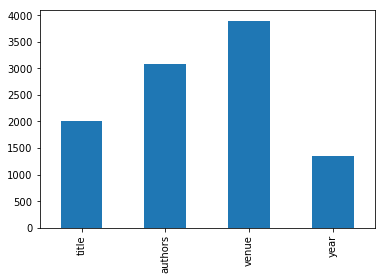

In [24]:
positives_variation_df = pd.DataFrame(data= pos_ri_norms,columns=attributes)
positives_variation_df.sum(numeric_only=True).plot.bar()

In [25]:
positives_variation_df.to_csv('experiment_results/testpos_ri_hybrid.csv',index=False)

## Nearest neighbors discovery

In [26]:
from utils.distance_measures import calculate_nearest_neighbors_onAttributes

In [27]:
negatives_closer_vectors_df = calculate_nearest_neighbors_onAttributes(testneg_hybrid,testneg_ids_hybrid,
                                                                       neg_ri,positives_hybrid,pos_ids_hybrid,
                                                                      attributes,attribute_len,min_similarity=0.5)


100%|██████████| 128/128 [00:00<00:00, 295.31it/s]

100%|██████████| 128/128 [00:00<00:00, 357.02it/s]

100%|██████████| 128/128 [00:00<00:00, 457.48it/s][A

100%|██████████| 128/128 [00:00<00:00, 458.25it/s][A

100%|██████████| 109/109 [00:00<00:00, 457.55it/s][A

100%|██████████| 128/128 [00:00<00:00, 458.29it/s][A

100%|██████████| 128/128 [00:00<00:00, 457.79it/s][A

100%|██████████| 128/128 [00:00<00:00, 457.72it/s][A

100%|██████████| 128/128 [00:00<00:00, 459.14it/s][A

100%|██████████| 128/128 [00:00<00:00, 460.98it/s][A

100%|██████████| 128/128 [00:00<00:00, 459.09it/s][A

100%|██████████| 128/128 [00:00<00:00, 461.05it/s][A

100%|██████████| 128/128 [00:00<00:00, 457.54it/s][A

100%|██████████| 128/128 [00:00<00:00, 454.86it/s][A

100%|██████████| 128/128 [00:00<00:00, 462.36it/s][A

100%|██████████| 128/128 [00:00<00:00, 461.08it/s][A


In [28]:
negatives_closer_vectors_df.to_csv('experiment_results/testnegNNHybrid_filtered.csv',index=False)

In [29]:
positives_closer_vectors_df = calculate_nearest_neighbors_onAttributes(testpos_hybrid,testpos_ids,pos_ri,
                                                                      negatives_hybrid,neg_ids_hybrid,
                                                                      attributes,attribute_len,min_similarity=0.5)


100%|██████████| 128/128 [00:00<00:00, 133.43it/s]

100%|██████████| 128/128 [00:00<00:00, 170.80it/s]

100%|██████████| 128/128 [00:00<00:00, 171.24it/s]

100%|██████████| 60/60 [00:00<00:00, 170.76it/s]


In [34]:
positives_closer_vectors_df.to_csv('experiment_results/testposNNHybrid_w.csv',index=False)